In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
file = pd.read_excel("ZF_Elec_Responses.xlsx")

In [3]:
file.shape

(90, 17)

In [4]:
file.head()

,Timestamp,Full Name (3 names at least),Phone Number,Email,Faculty - Department,Academic Year,Date of birth,Facebook URL,LinkedIn URL (optional),What do you know about Z Fast Racing Team?,How did you hear about us?,Do you have any volunteering experience?,"If yes, what is your volunteering experience?",What do you know about electrical vehicle ?,What do you know about competition we participate ?,What do you seek to learn by joining Z Fast Team?,Any questions?
0,2022-05-12 19:30:19.458,Mohamed Monir Mohamed,01210933802,mohameddobea13@gmail.com,Electrical engineering,3rd year,2000-11-11,https://www.facebook.com/Mohamed.Monir0,https://www.linkedin.com/in/mohamed-dobea-a911...,Z-Fast is the team that represents to Zagazig ...,Facebook,Yes,I have volunteered with AIESEC SOLVAKIAN organ...,It is an automotive vehicle that uses one or m...,EVER is giving young engineer the opportunity ...,I would like to improve my skills in embedded ...,NaN
1,2022-05-12 20:01:06.995,Mohammed Salah Aboshosha,01027463950,mohamedaboshosha12@gmail.com,Engineering - Electrical,2nd year,2001-10-27,https://www.facebook.com/Mohammedsalah.hasona,https://www.linkedin.com/in/mohammed-salah-hasona,Z Fast is a racing team which represents Zagaz...,"Facebook, Friends",Yes,Joined zag eng family for about one and half y...,To sum up electrical vehicles are vehicles tha...,EVER competition as Z Fast got the best Innova...,Learning more about embedded systems and elect...,No thanks
2,2022-05-12 20:15:51.354,mohamed salah fathy abdelhamid,01004257855,medosalahmedo4@gmail.com,engengineering-mechatronics,3rd year,2000-11-17,https://www.facebook.com/medo.salah210/,NaN,its a team represents Zagazig University in El...,"Facebook, Friends",No,this will be first time,An electric vehicle (EV) is one that uses an e...,i know that you make an electrical vehicle tha...,I am seeking to develop my skills in embedded ...,thanks
3,2022-05-12 20:17:26.297,Omar Saad Mohamed Saad Soliman,01149493914,mingosos13@gmail.com,Mechatronics,3rd year,2001-01-27,https://www.facebook.com/omar.saad.3726,https://www.linkedin.com/in/omar-soliman-a4198...,A team that makes an electric car and enter co...,"Facebook, Friends, Faculty colleagues",No,no thing,They are new vehicle that run on electric batt...,no thing,New skills in communication and working by my ...,no
4,2022-05-12 20:30:14.318,ماجد علاء السيد محمد,01013414668,Magedalaazsc@gmail.com,كلية الهندسة - أولى كهربا,2nd year,2002-02-24,https://www.facebook.com/maged.alaa.315,NaN,تيم طموح بيعمل حاجة عندي الشغف اتعلمها واطلع ط...,"Facebook, Friends",Yes,Zag Eng team ( for 6 months - now)\nResala cha...,صديقة للبيئة وموفرة وهي حاجة جديد ففيها مجال ل...,اسمها EVER تقريبا وخاصة بتصميم وتشغيل سيارات ا...,اتعلم اردوينو مهم بالنسبالي جدا وكمان جزء ال E...,Thanks


In [5]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 17 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   Timestamp                                            90 non-null     datetime64[ns]
 1   Full Name (3 names at least)                         90 non-null     object        
 2   Phone Number                                         90 non-null     object        
 3   Email                                                90 non-null     object        
 4   Faculty - Department                                 90 non-null     object        
 5   Academic Year                                        90 non-null     object        
 6   Date of birth                                        90 non-null     datetime64[ns]
 7   Facebook URL                                         90 non-null     object        
 8   Li

In [6]:
## REMOVING NAN VALUES

file['Any questions?'].fillna("No", inplace = True)
file['What do you know about competition we participate ?'].fillna("Nothing", inplace = True)
file['What do you know about electrical vehicle ?'].fillna("Nothing", inplace = True)
file['LinkedIn URL (optional)'].fillna("Not given", inplace = True)

In [7]:
## SETTING ALL ANSWERS THAT ARE NO TO A SET VALUE TO MAKE IT EASIER

file['Any questions?'] = file['Any questions?'].apply(lambda x: "No" if len(x) < 45 else x)

#file['Any questions?'].value_counts()

In [8]:
## SETTING ALL NOTHING ANSWERS TO A SET VALUE TO MAKE IT EASIER

compmask = file['What do you know about competition we participate ?'].str.lower().str.contains('nothing')
compmask.size
file.loc[compmask, 'What do you know about competition we participate ?'] = 'Nothing'

#file['What do you know about competition we participate ?'].value_counts()

In [11]:
#################################### Results of analysing the Data ########################################################

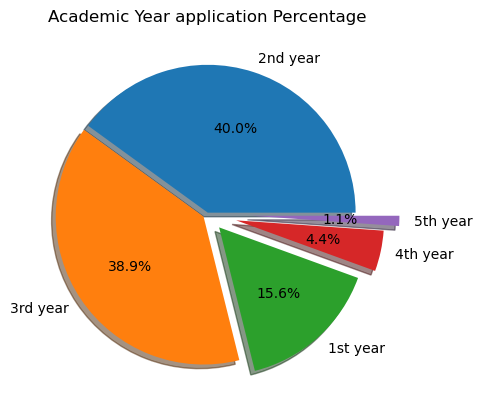

In [12]:
## using analysis it's found that the majority of the applicants are from 
## the 2rd academic year with the 3rd academic year coming in a close 2nd

counts = file['Academic Year'].value_counts()
labels = counts.index
values = counts.values
explode =  (0.011, 0.03, 0.12, 0.2, 0.3)
fig, ax = plt.subplots()
pie = ax.pie(values, labels=labels, explode=explode, shadow=True, autopct = '%1.1f%%')
ax.title.set_text("Academic Year application Percentage")
plt.show()

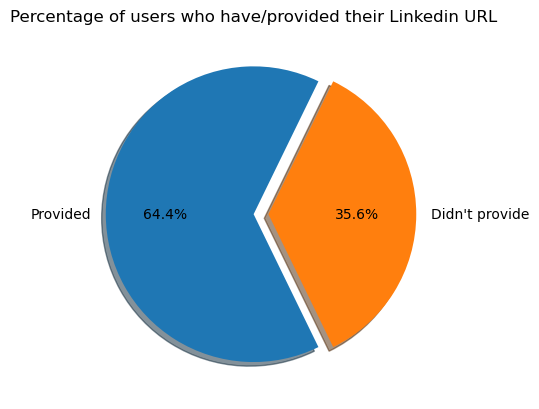

In [13]:
## It's also found that 35.6% of the users who filled the form didn't have 
## or didn't provide their linkedin account compared to the 64.4% who did

given = file['LinkedIn URL (optional)'].count()-file['LinkedIn URL (optional)'].value_counts()["Not given"]
notgiven = file['LinkedIn URL (optional)'].value_counts()["Not given"]

labels = ['Provided', 'Didn\'t provide']
values = [given , notgiven]
explode = (0, .1)
fig, ax = plt.subplots()
pie = ax.pie(values, labels = labels,explode=explode ,shadow=True, autopct = "%1.1f%%", startangle = 64)
ax.title.set_text("Percentage of users who have/provided their Linkedin URL")

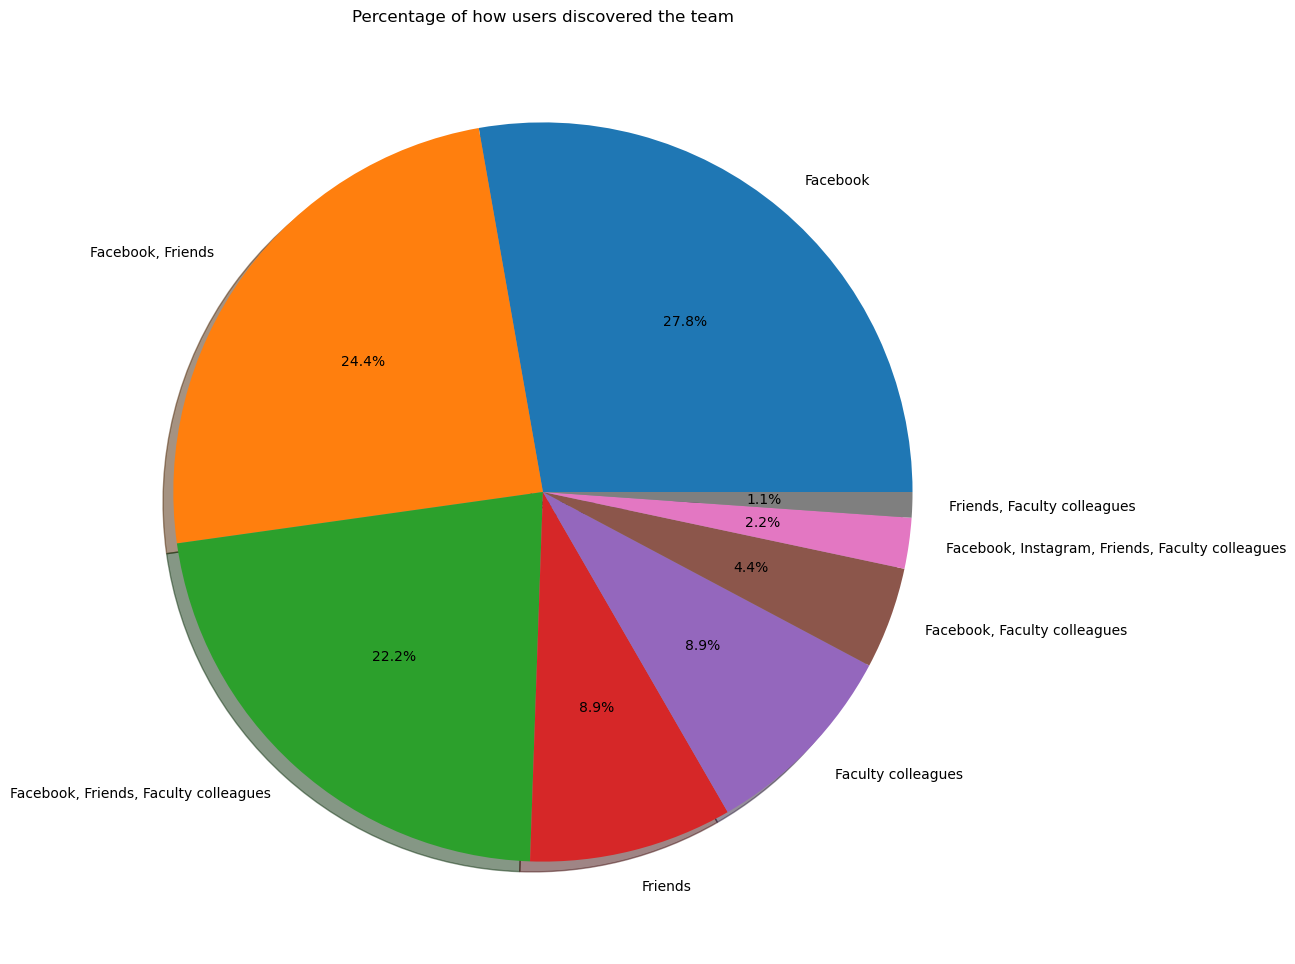

In [14]:
## It's also found that the majority of applicants found out about the team 
## throught facebook, friends and faculty colleagues

## it's shown that on social media, the facebook group is doing much better
## than the instgram page

## it's also shown that the knowledge about the team being shared verbaly
## is a close second in effectiveness in spreading the word about the team


labels = file['How did you hear about us?'].value_counts().index
values = file['How did you hear about us?'].value_counts().values

fig, ax= plt.subplots(figsize=(12, 12))
pie = ax.pie(values, labels=labels, shadow=True, autopct='%1.1f%%')
ax.title.set_text("Percentage of how users discovered the team")

plt.show()

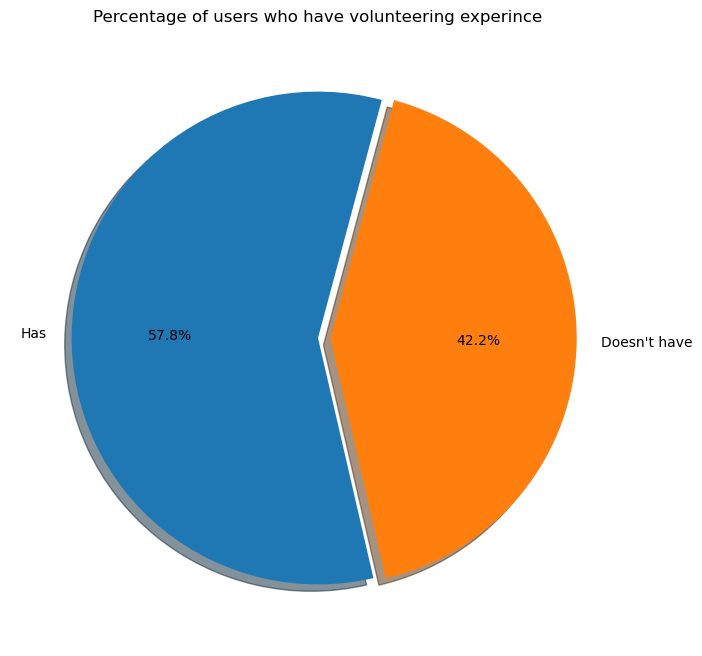

In [15]:
## We can also see that slightly more than half of the applicants have previous volunteering experience

labels = ['Has', 'Doesn\'t have']
values = volunteering = file['Do you have any volunteering experience?'].value_counts().values

explode = (0, .05)

fig, ax= plt.subplots(figsize=(8, 8))

pie = ax.pie(values, labels=labels, explode=explode, shadow=True, autopct="%1.1f%%", startangle=75)
ax.title.set_text("Percentage of users who have volunteering experince")


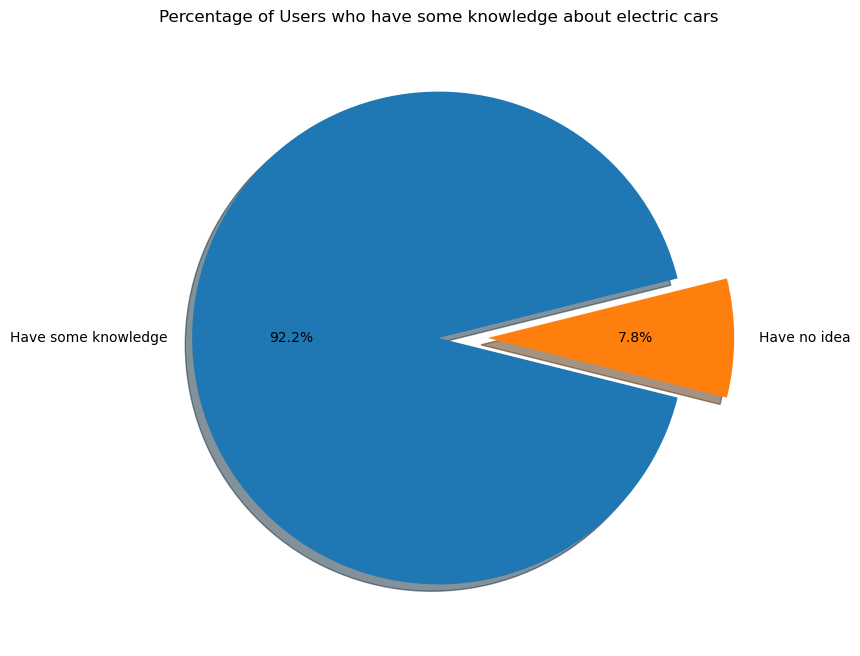

In [16]:
## We also find out that a very small percentage of applicants (7.8%) have absolutely no knowledge/didn't provide any answer
## when asked what they know about electric cars

know = file['What do you know about electrical vehicle ?'].count()-file['What do you know about electrical vehicle ?'].value_counts()["Nothing"]
dontknow = file['What do you know about electrical vehicle ?'].value_counts()["Nothing"]

labels = ['Have some knowledge', 'Have no idea']
values = [know , dontknow]

explode = (0, 0.2)
fig, ax= plt.subplots(figsize=(8,8))
pie = ax.pie(values, labels=labels, explode=explode, shadow=True, autopct="%1.1f%%", startangle=14)
ax.title.set_text("Percentage of Users who have some knowledge about electric cars")

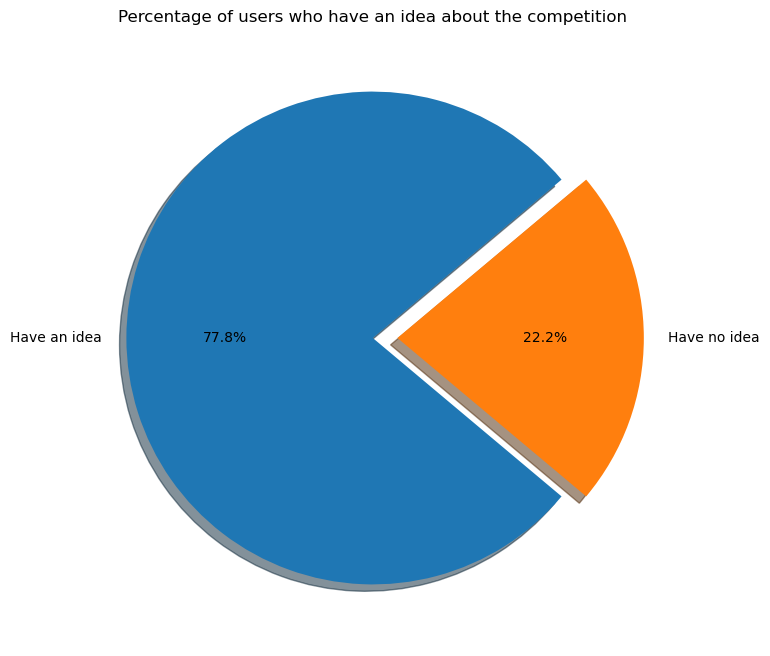

In [17]:
## It's also found that a minority of the applicants (22.2%) had no idea/didn't provide any knowledge about the competition
## the team participates in compared to (77.8%) who provided answers

compknow = file['What do you know about competition we participate ?'].count()-file['What do you know about competition we participate ?'].value_counts()['Nothing']
compknownt = file['What do you know about competition we participate ?'].value_counts()["Nothing"]

labels = ['Have an idea', 'Have no idea']
values = [compknow, compknownt]

explode = (0, 0.1)
fig, ax= plt.subplots(figsize=(8,8))
pie = ax.pie(values, labels=labels, explode=explode, shadow=True, autopct="%1.1f%%", startangle=40)
ax.title.set_text("Percentage of users who have an idea about the competition")

QUESTIONS ASKED BY USERS:

I have summer training in August, I wish this don't hinder accepting me.

How much time and effort should I put in the team? Is it possible to joib IEEE RAS next year insha'Allah?



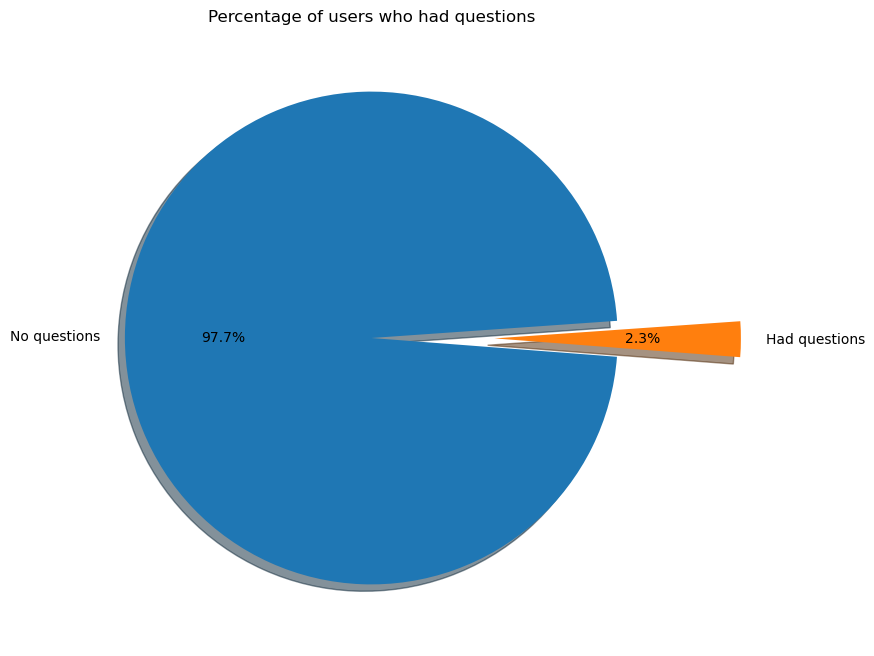

In [18]:
## We also see that a small percentage of applicants(2.2% / 2 applicants) had some sort of inquiry 
## they are printed below 

askedquestions = file['Any questions?'].unique()[5:7]

noquestions = file['Any questions?'].value_counts()["No"]
questions = file['Any questions?'].count()-noquestions

labels = ["No questions", "Had questions"]
values = [noquestions, len(askedquestions)]

explode = (0, 0.5)
fig, ax= plt.subplots(figsize=(8,8))
pie = ax.pie(values, labels=labels, explode=explode, shadow=True, autopct="%1.1f%%", startangle = 4)
ax.title.set_text("Percentage of users who had questions")

print('QUESTIONS ASKED BY USERS:\n')
for i in askedquestions:
    print(i)
    print()

In [19]:
######################################### IN CONCLUSION #################################################################

In [20]:
# It's found that the majority of the applicants are from the 2rd academic year with the 3rd academic year coming in a close 2nd

# It's also found that 35.6% of the users who filled the form didn't have or didn't provide their linkedin account compared to the 64.4% who did

#It's also found that the majority of applicants found out about the team throught facebook, friends and faculty colleagues
#This shows that on social media, the facebook group is doing much better than the instgram page
#It also shows that the knowledge about the team being shared verbaly has a big factor in many applicants knowing about the team

#We can also see that slightly more than half of the applicants(57.8%) have previous volunteering experience compared to (42.2%) who don'y have prior experience

#We also find out that a very small percentage of applicants (7.8%) have absolutely no knowledge/didn't provide any answer when asked what they know about electric cars compared to (92.2%) who did

#It's also found that a minority of the applicants (22.2%) had no idea/didn't provide any knowledge about the competition the team participates in compared to (77.8%) who provided answers

# We also see that a small percentage of applicants(2.2% / 2 applicants) had some sort of inquiry which i believe are questions that other applicants might want to know the answer to aswell:
# The Questions are : if applying to the team will hinder applicants summer training & how much time the does the team require as commitment
